<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Phyton_kriging: Kriging iterative method in 1D </font>
</div>


- **Fecha**: 2023/06/06
        
- **Objetivos**: Procesamiento de imagen basado en Kriging
- **Descripción** Tutorial for determining how it works

- **Autores**: 
    - Luis Miguel Sánchez Brea
    - Luis Blas Braunschweig Leotte

# inicialización y librerias

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [3]:
from matplotlib import rcParams

rcParams['figure.dpi'] = 160
rcParams['lines.markersize']=10
#rcParams['image.cmap']='gray'
rcParams['figure.figsize']=(6,6)

%matplotlib inline


In [4]:
from phyton_kriging import np, plt


from phyton_kriging.variogram_1D import experimental, theoretical, fitting

from phyton_kriging.standard_1D import kriging1D
from phyton_kriging.convolution_1D import Convolution_1D

# Obtenemos imagen

In [5]:
import cv2
from PIL import Image


In [6]:
im = Image.open('imagenes_fondo/152811sunny.tiff')

imarray = np.array(im)
imarray[imarray>2**14]=imarray[imarray>2**14]-[2**16-2**14]
imarray=imarray[210:230,990:1010]

gray = imarray.copy()
centroy,centrox=[10,10]
gray[centroy,centrox]=gray[centroy,centrox]+20

plt.figure()
plt.imshow(gray)
plt.colorbar(location='bottom')
plt.title('Imagen original')

num_y,num_x=np.shape(imarray)
ROI=2



# 1D

## Cielo y simulacion


mini prueba de que lo que hemos programado funciona

/home/luismiguel/bitbucket/phyton_kriging/phyton_kriging/standard_1D.py:135: RuntimeWarning: invalid value encountered in sqrt
  self.error = np.array(np.sqrt(error2))


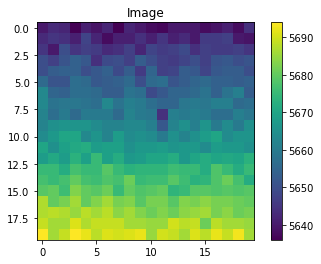

In [7]:
imagen_kriging=imarray.copy()
num_samplingy =np.arange(centroy-ROI,centrox+ROI)
display=7
y=np.concatenate((np.arange(0,centroy-ROI),np.arange(centroy+ROI,num_y)))

for i in num_samplingy:
    z1=gray[:,i]
    z=np.concatenate((z1[0:centroy-ROI],z1[centroy+ROI:num_y]))

    var_exp=experimental(y,z)
    i_points = np.arange(0, num_y/2)
    var_exp.compute(i_points)

    fitting1 = fitting(type='cuadratico', var_exp=var_exp)
    
    lc, A, sc = fitting1.fit_cuadratico()
    if display==0:
        fitting1.draw_fitting('normal')
        var_exp.draw('normal')
        display=7
    

    var_theo = theoretical(h=i_points)
    var_theo.cuadratico(sc=sc, A=A, lc=lc)
    
    sensors = np.zeros((num_y-ROI*2, 3), dtype=float)
    sensors[:, 0] = y
    sensors[:, 1] = z
    sensors[:, 2] = 0.5 * np.ones_like(sensors[:, 0])
    

    krig1 = kriging1D(sensors=sensors, variogram=var_theo, sampling=num_samplingy)
    krig1.standard()
    imagen_kriging[:,i]=(np.concatenate((z1[0:centroy-ROI],krig1.estimation,z1[centroy+ROI:num_y])))


plt.figure()
plt.imshow(imagen_kriging)
plt.title('Imagen obtenida con Kriging')
plt.colorbar(location='bottom')
plt.show()


5693 5711


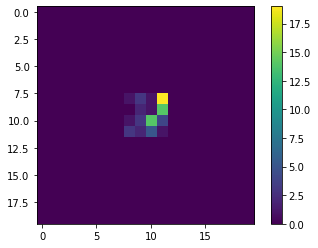

In [8]:
sim=10
print(imagen_kriging[sim,sim],gray[sim,sim])
plt.figure()
dif=cv2.absdiff(gray,imagen_kriging)
plt.imshow(dif)
plt.colorbar(location='bottom')
plt.title('Diferencia entre imágenes')

plt.show()

## Cielo y mechero

En vez de una simulacion, le meto la llama del mechero a ver que sale, es una nivel de cuentas absurdo

In [9]:
im = Image.open('eventos/test_bench/enchufado_raw.tiff')
mechero = np.array(im)
mechero[mechero>2**14]=mechero[mechero>2**14]-[2**16-2**14]
mechero=mechero[251:254,389:392] 

plt.figure()
plt.imshow(mechero)
plt.title('Image')
plt.colorbar()
plt.show()

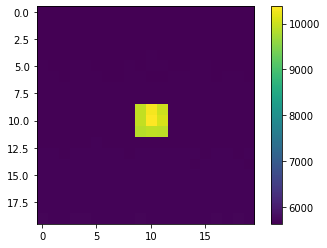

In [10]:
im = Image.open('imagenes_fondo/152811sunny.tiff')

imarray = np.array(im)
imarray[imarray>2**14]=imarray[imarray>2**14]-[2**16-2**14]
imarray=imarray[200:220,980:1000]

gray = imarray.copy()
centroy,centrox=[10,10]
gray[centroy-1:centroy+2,centrox-1:centrox+2]=mechero

plt.figure()
plt.imshow(gray)
plt.colorbar(location='right')

num_y,num_x=np.shape(imarray)
ROI=3



## Horizonte


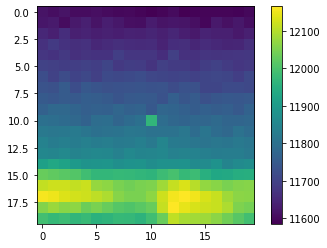

In [11]:
im = Image.open('imagenes_fondo/0620atardecer.tiff')

imarray = np.array(im)
imarray[imarray>2**14]=imarray[imarray>2**14]-[2**16-2**14]
imarray=imarray[50:400,639+28:639+460+20] #cojo el canal que quiero
imarray=imarray[245:265,250:270] #delimito zona a mano gracias a la go pro

gray = imarray.copy()
centroy,centrox=[10,10]
gray[centroy,centrox]=gray[centroy,centrox]+50

plt.figure()
plt.imshow(gray)
plt.colorbar(location='right')

num_y,num_x=np.shape(imarray)
ROI=2



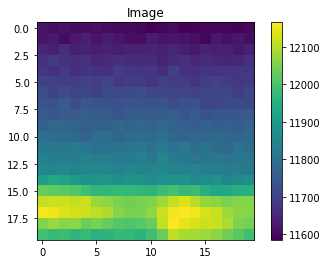

In [12]:
imagen_kriging=imarray.copy()
num_samplingy =np.arange(centroy-ROI,centrox+ROI)
display=7
y=np.concatenate((np.arange(0,centroy-ROI),np.arange(centroy+ROI,num_y)))

for i in num_samplingy:
    z1=gray[:,i]
    z=np.concatenate((z1[0:centroy-ROI],z1[centroy+ROI:num_y]))

    var_exp=experimental(y,z)
    i_points = np.arange(0, num_y/2)
    var_exp.compute(i_points)

    fitting1 = fitting(type='lineal', var_exp=var_exp)
    
    lc, sc = fitting1.fit_lineal()





    var_theo = theoretical(h=i_points)
    var_theo.lineal(sc=sc,lc=lc)
    
    sensors = np.zeros((num_y-ROI*2, 3), dtype=float)
    sensors[:, 0] = y
    sensors[:, 1] = z
    sensors[:, 2] = 0.5 * np.ones_like(sensors[:, 0])
    

    krig1 = kriging1D(sensors=sensors, variogram=var_theo, sampling=num_samplingy)
    krig1.standard()
    imagen_kriging[:,i]=(np.concatenate((z1[0:centroy-ROI],krig1.estimation,z1[centroy+ROI:num_y])))
    if display==0:
        plt.figure()
        
        plt.plot(var_theo.variogram)
        plt.plot(var_exp.variogram)
        display=7


plt.figure()
plt.imshow(imagen_kriging)
plt.title('Image')
plt.colorbar()
plt.show()


11786 11807


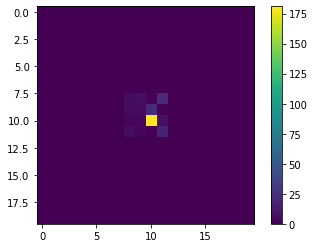

In [13]:
sim=10
print(imagen_kriging[sim,sim],gray[sim,sim])
plt.figure()
dif=cv2.absdiff(gray,imagen_kriging)

plt.imshow(dif)
plt.colorbar()

plt.show()

## Test bench

In [14]:
im = Image.open('eventos/test_bench/enchufado_raw.tiff')
imarray = np.array(im)
imarray[imarray>2**14]=imarray[imarray>2**14]-[2**16-2**14]
imarray=imarray[237:267,375:405] 
gray=imarray.copy()


plt.figure()
plt.imshow(gray)
plt.colorbar(location='right')
plt.clim([9850,10200])

num_y,num_x=np.shape(imarray)
ROI=3
centroy=centrox=15

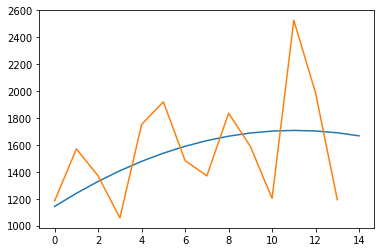

In [15]:
imagen_kriging=imarray.copy()
num_samplingy =np.arange(centroy-ROI,centrox+ROI)
display=0
y=np.concatenate((np.arange(0,centroy-ROI),np.arange(centroy+ROI,num_y)))

for i in num_samplingy:
    z1=gray[:,i]
    z=np.concatenate((z1[0:centroy-ROI],z1[centroy+ROI:num_y]))

    var_exp=experimental(y,z)
    i_points = np.arange(0, num_y/2)
    var_exp.compute(i_points)

    fitting1 = fitting(type='cuadratico', var_exp=var_exp)
    
    lc,A, sc = fitting1.fit_cuadratico()


    var_theo = theoretical(h=i_points)
    var_theo.cuadratico(sc=sc,A=A,lc=lc)
    
    sensors = np.zeros((num_y-ROI*2, 3), dtype=float)
    sensors[:, 0] = y
    sensors[:, 1] = z
    sensors[:, 2] = 0.5 * np.ones_like(sensors[:, 0])
    

    krig1 = kriging1D(sensors=sensors, variogram=var_theo, sampling=num_samplingy)
    krig1.standard()
    imagen_kriging[:,i]=(np.concatenate((z1[0:centroy-ROI],krig1.estimation,z1[centroy+ROI:num_y])))
    if display==0:
        plt.figure()
        
        plt.plot(var_theo.variogram)
        plt.plot(var_exp.variogram)
        display=7


plt.figure()
plt.imshow(imagen_kriging)
plt.title('Image')
plt.colorbar()
plt.show()


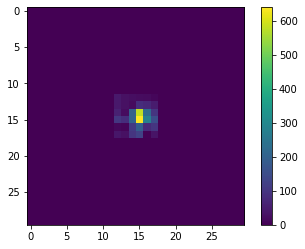

In [16]:
plt.figure()
dif=cv2.absdiff(gray,imagen_kriging)


plt.imshow(dif)
plt.colorbar()

plt.show()

## Avion

## Avion grande

Ahora haremos el kriging con un avion

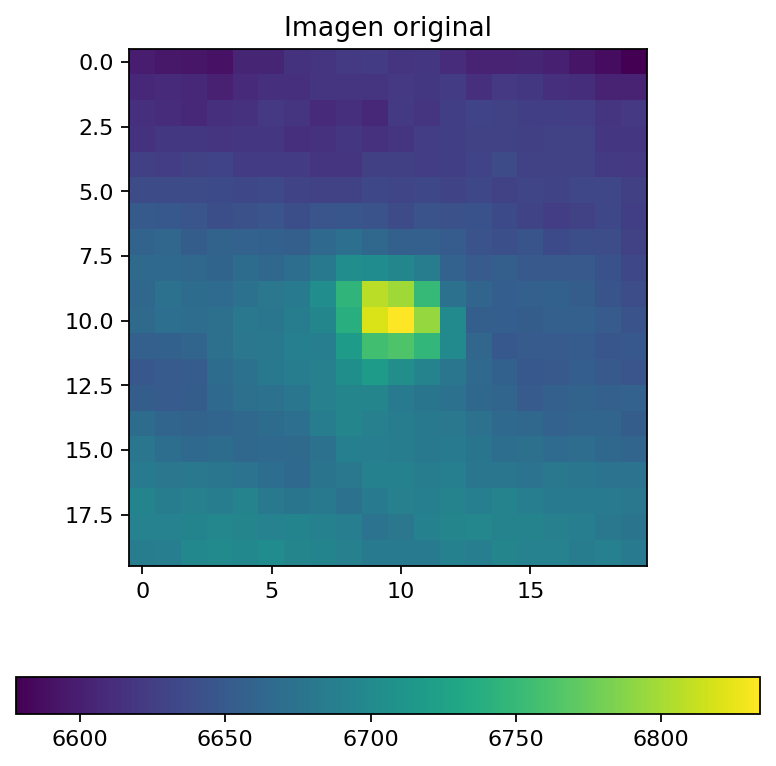

In [83]:
im = Image.open('eventos/avion/avion.tiff')

imarray = np.array(im)
imarray[imarray>2**14]=imarray[imarray>2**14]-[2**16-2**14]
imarray=imarray[50:400,639+28:639+460+20] #cojo el canal que quiero
zoom=imarray[50:220,140:350]

gray=zoom[128:148,63:83]



plt.figure()
plt.imshow(gray)
plt.colorbar(location='bottom')
plt.title('Imagen original')


num_y,num_x=np.shape(gray)
ROI=3
centroy=centrox=10

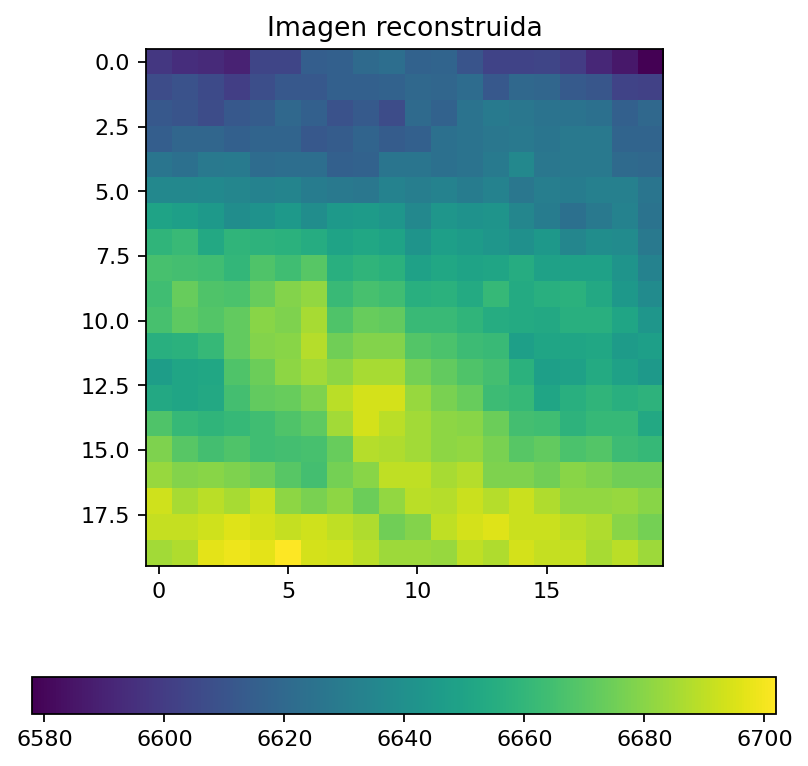

In [82]:
imagen_kriging=gray.copy()
num_samplingy =np.arange(centroy-ROI,centrox+ROI)
display=1
y=np.concatenate((np.arange(0,centroy-ROI),np.arange(centroy+ROI,num_y)))

for i in num_samplingy:
    z1=gray[:,i]
    z=np.concatenate((z1[0:centroy-ROI],z1[centroy+ROI:num_y]))

    var_exp=experimental(y,z)
    i_points = np.arange(0, num_y/2)
    var_exp.compute(i_points)

    fitting1 = fitting(type='cuadratico', var_exp=var_exp)
    
    lc,A, sc = fitting1.fit_cuadratico()


    var_theo = theoretical(h=i_points)
    var_theo.cuadratico(sc=sc,A=A,lc=lc)
    
    sensors = np.zeros((num_y-ROI*2, 3), dtype=float)
    sensors[:, 0] = y
    sensors[:, 1] = z
    sensors[:, 2] = 0.5 * np.ones_like(sensors[:, 0])
    

    krig1 = kriging1D(sensors=sensors, variogram=var_theo, sampling=num_samplingy)
    krig1.standard()
    imagen_kriging[:,i]=(np.concatenate((z1[0:centroy-ROI],krig1.estimation,z1[centroy+ROI:num_y])))
    if display==0:
        plt.figure()
        
        plt.plot(var_theo.variogram,label='teorico')
        plt.plot(var_exp.variogram,label='experimental')
        plt.legend()
        display=7


plt.figure()
plt.imshow(imagen_kriging)
plt.title('Imagen reconstruida')
plt.colorbar(location='bottom')
plt.show()


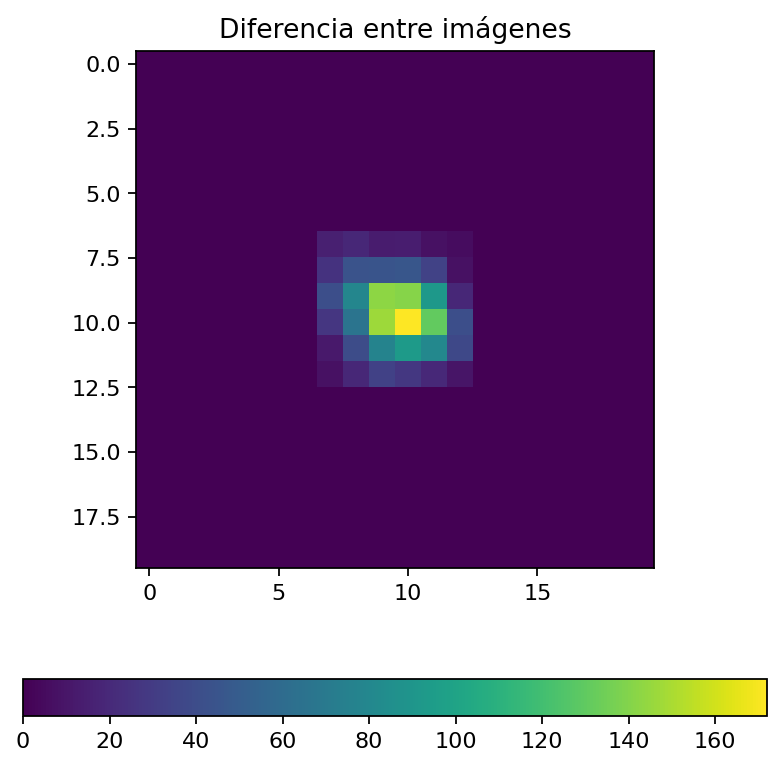

In [84]:
plt.figure()
dif=cv2.absdiff(gray,imagen_kriging)


plt.imshow(dif)
plt.colorbar(location='bottom')
plt.title('Diferencia entre imágenes')
plt.show()

## Avion chico

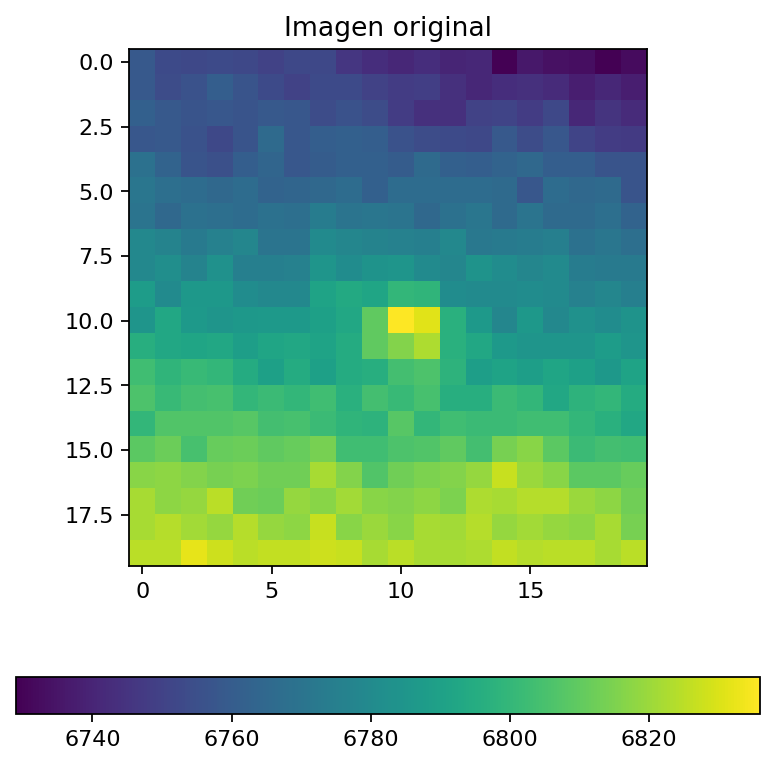

In [85]:
im = Image.open('eventos/avion/avionchico.tiff')

imarray = np.array(im)
imarray[imarray>2**14]=imarray[imarray>2**14]-[2**16-2**14]
imarray=imarray[50:400,639+28:639+460+20] #cojo el canal que quiero
zoom=imarray[90:290,140:350]

gray=zoom[116:136,51:71]





plt.figure()
plt.imshow(gray)
plt.colorbar(location='bottom')
plt.title('Imagen original')

num_y,num_x=np.shape(gray)
ROI=3
centroy=centrox=10

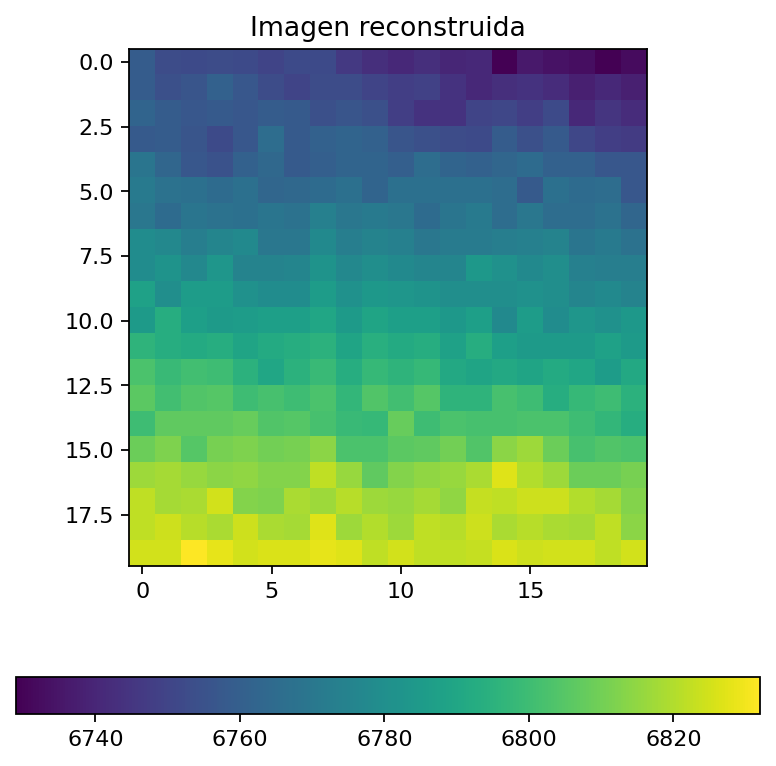

In [86]:
imagen_kriging=gray.copy()
num_samplingy =np.arange(centroy-ROI,centrox+ROI)
display=1
y=np.concatenate((np.arange(0,centroy-ROI),np.arange(centroy+ROI,num_y)))

for i in num_samplingy:
    z1=gray[:,i]
    z=np.concatenate((z1[0:centroy-ROI],z1[centroy+ROI:num_y]))

    var_exp=experimental(y,z)
    i_points = np.arange(0, num_y/2)
    var_exp.compute(i_points)

    fitting1 = fitting(type='cuadratico', var_exp=var_exp)
    
    lc,A, sc = fitting1.fit_cuadratico()


    var_theo = theoretical(h=i_points)
    var_theo.cuadratico(sc=sc,A=A,lc=lc)
    
    sensors = np.zeros((num_y-ROI*2, 3), dtype=float)
    sensors[:, 0] = y
    sensors[:, 1] = z
    sensors[:, 2] = 0.5 * np.ones_like(sensors[:, 0])
    

    krig1 = kriging1D(sensors=sensors, variogram=var_theo, sampling=num_samplingy)
    krig1.standard()
    imagen_kriging[:,i]=(np.concatenate((z1[0:centroy-ROI],krig1.estimation,z1[centroy+ROI:num_y])))
    if display==0:
        plt.figure()
        
        plt.plot(var_theo.variogram,label='teorico')
        plt.plot(var_exp.variogram,label='experimental')
        plt.legend()
        display=7


plt.figure()
plt.imshow(imagen_kriging)
plt.title('Imagen reconstruida')
plt.colorbar(location='bottom')
plt.show()


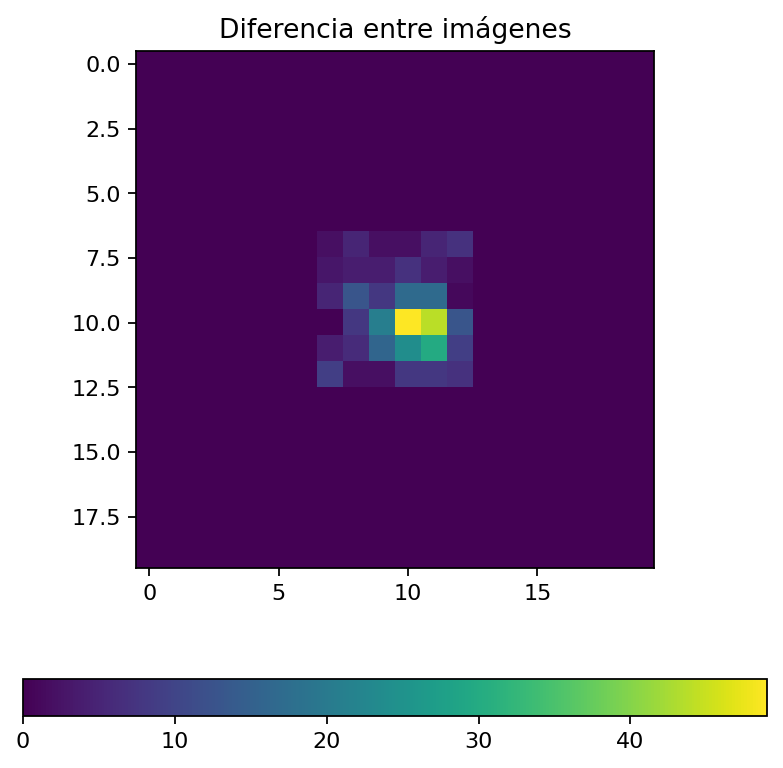

In [87]:
plt.figure()
dif=cv2.absdiff(gray,imagen_kriging)


plt.imshow(dif)
plt.colorbar(location='bottom')
plt.title('Diferencia entre imágenes')
plt.show()

# 2 D

In [17]:
from phyton_kriging.variogram_2D import experimental, theoretical, fitting
import scipy
from scipy.spatial import distance

from phyton_kriging.utils_math import nearest, nearest2
from phyton_kriging.standard_2D import kriging2D
from phyton_kriging import np, plt, degrees


## Cielo despejado

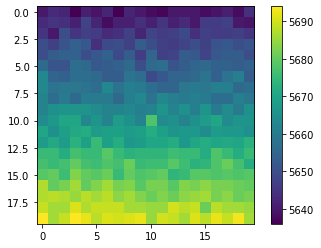

In [18]:
im = Image.open('imagenes_fondo/152811sunny.tiff')

imarray = np.array(im)
imarray[imarray>2**14]=imarray[imarray>2**14]-[2**16-2**14]
imarray=imarray[200:220,980:1000]

gray = imarray.copy()
centroy,centrox=[10,10]
gray[centroy,centrox]=gray[centroy,centrox]+10

plt.figure()
plt.imshow(gray)
plt.colorbar(location='right')

num_y,num_x=np.shape(imarray)
ROI=2



109


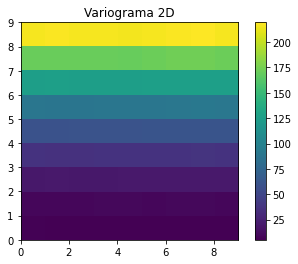

In [81]:
imagen_kriging=imarray.copy()

num_sensors= (num_y * num_x)-(ROI*2)**2
sensors = np.zeros((num_sensors, 4), dtype=float)
positions = np.zeros((num_sensors, 2), dtype=float)

x = np.arange(0,num_x)
y = np.arange(0,num_y)
X,Y = np.meshgrid(x, y)
x = X.flatten()
y = Y.flatten()
z=imarray.flatten()

# Bucle para conseguir eliminar de la imagen los píxeles del ROI
zz=[0]
for i in np.arange(-ROI,ROI):
    zz.append(((centroy+i)*num_x)+centrox-ROI)
    zz.append(((centroy+i)*num_x)+centrox+ROI)
zz.append(num_x*num_y)
zzz=z[zz[0]:zz[1]]
xxx=x[zz[0]:zz[1]]
yyy=y[zz[0]:zz[1]]
samp_x=[]
samp_y=[]
for i in np.array(np.arange(2,len(zz),2)):
    zzz=np.concatenate((zzz,z[zz[i]:zz[i+1]]))
    xxx=np.concatenate((xxx,x[zz[i]:zz[i+1]]))
    yyy=np.concatenate((yyy,y[zz[i]:zz[i+1]]))
    samp_x=np.concatenate((samp_x,x[zz[i-1]:zz[i]]))
    samp_y=np.concatenate((samp_y,y[zz[i-1]:zz[i]]))




sensors[:, 0] = xxx
sensors[:, 1] = yyy
sensors[:, 2] = zzz
sensors[:, 3] = 0.0001 * np.ones_like(xxx)
sensors[:, 2] = sensors[:, 2] + sensors[:, 3] * np.random.randn(num_sensors)
positions = np.zeros((num_sensors, 2), dtype=float)
positions[:, 0] = xxx
positions[:, 1] = yyy
hx_var=np.arange((num_x/2))
hy_var=np.arange((num_y/2))
H=(hx_var,hy_var)
var_2d = experimental(sensors=sensors)
variogram, num_data = var_2d.compute(hx_var, hy_var, remove_origin=True, has_draw=True)
print(len(hx_var))

In [82]:
fitting2D = fitting(type='cuadratico', var_exp=var_2d)
lc ,A, sc = fitting2D.fit_cuadratico()



In [83]:
hx_var=[]
hy_var=[]
for i in np.arange(,num_x/2):
    for ii in np.arange(0,num_y/2):
        hx_var.append(i)
        hy_var.append(ii)

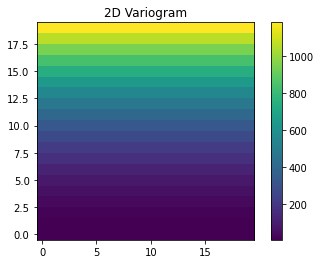

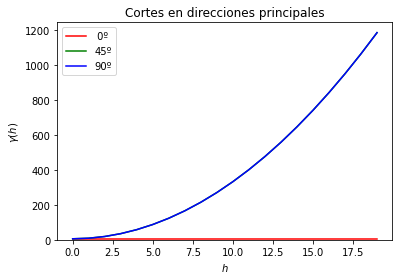

In [84]:
H=(hx_var,hy_var)
var_theo = theoretical(H, make_2D=True)
var_theo.gauss(sc=1, A=1, lc=(5, 2.5), angle=0*degrees )
var_theo.draw_luis()

In [114]:
def standard_new(self, filtering=True):
    """Standard kriging

    Args:
        * filtering: Si true se aplica la operacion LM para poder filtrar (tesis y articulo de AO)
                    Si False segun libros standard de kriging

    Outputs:
        * estimation
        * error
        * lambdas
    """

    xsensors = self.sensors[:, 0]
    ysensors = self.sensors[:, 1]
    data = self.sensors[:, 2]
    I = self.sensors[:, 3]

    Xsampling, Ysampling = self.Sampling
    Xsampling_size = len(Xsampling)
    Ysampling_size = len(Ysampling)

    xsampling = Xsampling.flatten()
    ysampling = Ysampling.flatten()

    XS1, XS2 = np.meshgrid(xsensors, xsensors)
    XS, XM = np.meshgrid(xsampling, xsensors)

    YS1, YS2 = np.meshgrid(ysensors, ysensors)
    YS, YM = np.meshgrid(ysampling, ysensors)

    # distance entre sensors
    distSensores = np.sqrt((XS2 - XS1)**2 + (YS2 - YS1)**2)
    distSensores_X = np.abs(XS2 - XS1)
    distSensores_Y = np.abs(YS2 - YS1)
    
    # distances entre sensors y points de sampling
    distSensoresMuestreo = np.sqrt((XS - XM)**2 + (YS - YM)**2)
    distSensoresMuestreo_X = np.abs(XS - XM)
    distSensoresMuestreo_Y = np.abs(YS - YM)

    print(distSensores_X.shape)

    # matrices principales

    
    Gamma = np.mat(self.variogram.get((distSensores_X, distSensores_Y)))

    print(Gamma.shape)
    gamma = np.mat(
        self.variogram.get((distSensoresMuestreo_X, distSensoresMuestreo_Y)))

    # Modificaciones LM según artículo AO
    if filtering == True:
        s0 = self.variogram.get((0.,0.))
        I1, I2 = np.meshgrid(I, I)


        gamma = gamma - s0 / 2
        Gamma = Gamma - I1 * I2
        for i in range(len(xsensors)):
            Gamma[i, i] = -I[i]**2
    else:
        for i in range(len(xsensors)):
            Gamma[i, i] = 0

    # definición de matrices
    U = np.mat(np.ones((len(xsensors), 1), dtype='float'))
    u = np.mat(np.ones((len(xsampling), 1), dtype='float'))
    Ut = np.transpose(U)
    ut = np.transpose(u)
    invGamma = Gamma.I

    g = (ut - Ut * invGamma * gamma)
    h = (Ut * invGamma * U).I
    lambdas = np.mat(np.transpose(gamma + U * h * g) * invGamma)

    error2 = np.squeeze(
        np.diag(
            np.transpose(gamma) * invGamma * gamma -
            np.transpose(g) * h * g))
    print(error2)
    plt.figure()
    plt.imshow(error2.reshape(60,60))
    plt.colorbar()
    self.error = np.array(np.sqrt(error2))
    self.estimation = np.squeeze(
        np.array(lambdas * np.transpose(np.mat(data))))

    self.error = np.transpose(
        self.error.reshape(Xsampling_size, Ysampling_size))
    self.estimation = np.transpose(
        self.estimation.reshape(Xsampling_size, Ysampling_size))

    lambdas = np.array(lambdas)

    self.lambdas = lambdas.reshape(
        (Xsampling_size, Ysampling_size, len(xsensors)))

    return self


In [115]:
print(samp_x.transpose())

[ 8.  9. 10. 11.  8.  9. 10. 11.  8.  9. 10. 11.  8.  9. 10. 11.]


In [116]:
H1=False

var_theo.get(H1)

In [117]:
sampling2D = np.array((samp_x, samp_y))
sampling2D = sampling2D.transpose()



In [118]:
sampling2D = samp_x.transpose(), samp_y.transpose()


In [119]:
print(sampling2D)

(array([ 8.,  9., 10., 11.,  8.,  9., 10., 11.,  8.,  9., 10., 11.,  8.,
        9., 10., 11.]), array([ 8.,  8.,  8.,  8.,  9.,  9.,  9.,  9., 10., 10., 10., 10., 11.,
       11., 11., 11.]))


In [124]:
print(sensors.shape)
print(sampling2D)

(384, 4)
(array([ 8.,  9., 10., 11.,  8.,  9., 10., 11.,  8.,  9., 10., 11.,  8.,
        9., 10., 11.]), array([ 8.,  8.,  8.,  8.,  9.,  9.,  9.,  9., 10., 10., 10., 10., 11.,
       11., 11., 11.]))


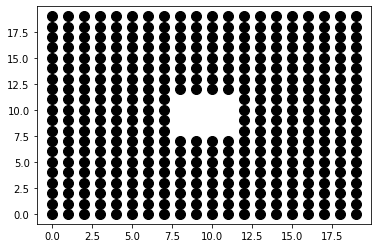

In [121]:
plt.plot(sensors[:,0], sensors[:,1],'ko')

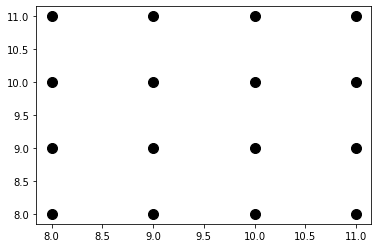

In [122]:
plt.plot(samp_x, samp_y, 'ko')


In [123]:
krig1 = kriging2D(sensors=sensors, variogram=var_theo, sampling=sampling2D)
krig1 = standard_new(krig1)
print(krig.variogram.get())

(384, 384)
(1, 400)


ValueError: operands could not be broadcast together with shapes (1,400) (384,384) 

In [69]:

krig1 = kriging2D(sensors=sensors, variogram=var_theo, sampling=sampling2D)
krig=standard_new(krig1)
print(krig.variogram.get())

ValueError: too many values to unpack (expected 2)

5664 5678


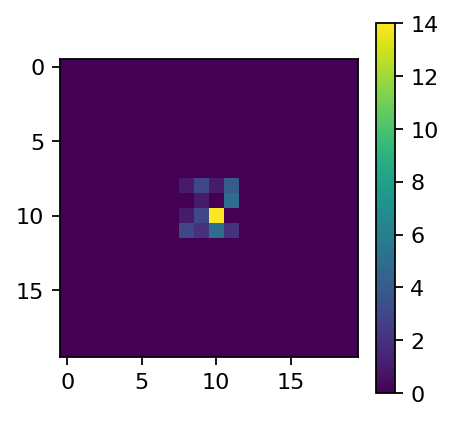

In [ ]:
sim=10
print(imagen_kriging[sim,sim],gray[sim,sim])
plt.figure()
dif=cv2.absdiff(gray,imagen_kriging)

plt.imshow(dif)
plt.colorbar()

plt.show()

## Horizonte

In [ ]:
im = Image.open('imagenes_fondo/0620atardecer.tiff')

imarray = np.array(im)
imarray[imarray>2**14]=imarray[imarray>2**14]-[2**16-2**14]
imarray=imarray[50:400,639+28:639+460+20] #cojo el canal que quiero
imarray=imarray[245:265,250:270] #delimito zona a mano gracias a la go pro

gray = imarray.copy()
centroy,centrox=[10,10]
gray[centroy,centrox]=gray[centroy,centrox]+100

plt.figure()
plt.imshow(gray)
plt.colorbar(location='right')

num_y,num_x=np.shape(imarray)
ROI=2



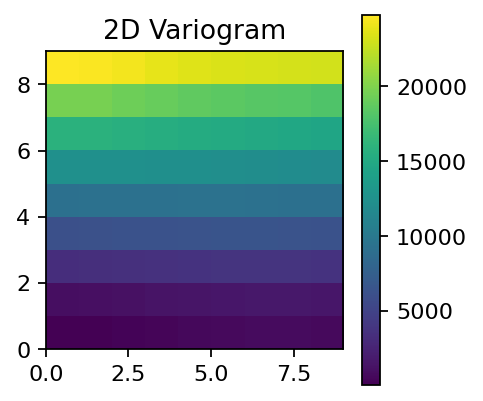

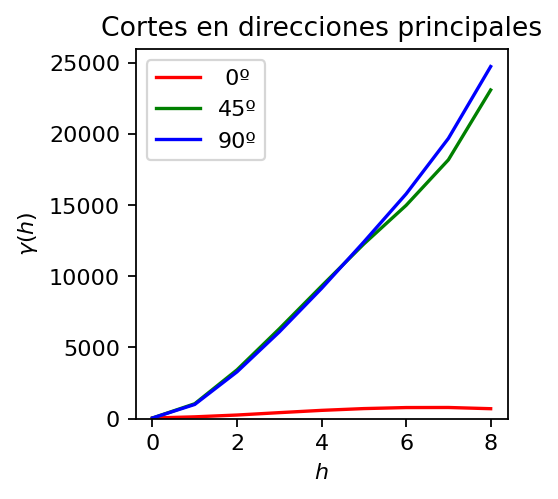

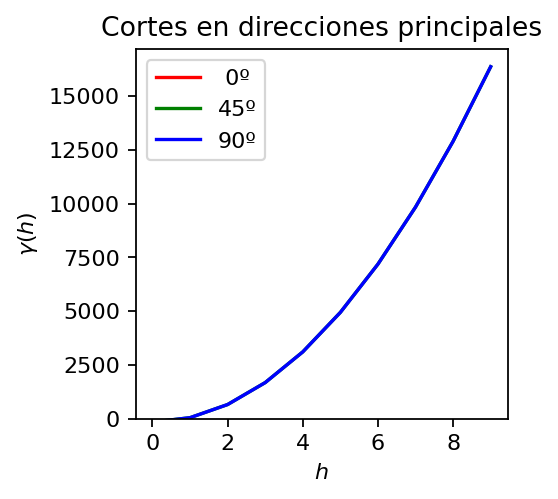

In [ ]:
imagen_kriging=imarray.copy()

num_sensors= (num_y * num_x)-(ROI*2)**2
sensors = np.zeros((num_sensors, 4), dtype=float)
positions = np.zeros((num_sensors, 2), dtype=float)

x = np.arange(0,num_x)
y = np.arange(0,num_y)
X,Y = np.meshgrid(x, y)
x = X.flatten()
y = Y.flatten()
z=imarray.flatten()

# Bucle para conseguir eliminar de la imagen los píxeles del ROI
zz=[0]
for i in np.arange(-ROI,ROI):
    zz.append(((centroy+i)*num_x)+centrox-ROI)
    zz.append(((centroy+i)*num_x)+centrox+ROI)
zz.append(num_x*num_y)
zzz=z[zz[0]:zz[1]]
xxx=x[zz[0]:zz[1]]
yyy=y[zz[0]:zz[1]]
samp_x=[]
samp_y=[]
for i in np.array(np.arange(2,len(zz),2)):
    zzz=np.concatenate((zzz,z[zz[i]:zz[i+1]]))
    xxx=np.concatenate((xxx,x[zz[i]:zz[i+1]]))
    yyy=np.concatenate((yyy,y[zz[i]:zz[i+1]]))
    samp_x=np.concatenate((samp_x,x[zz[i-1]:zz[i]]))
    samp_y=np.concatenate((samp_y,y[zz[i-1]:zz[i]]))




sensors[:, 0] = xxx
sensors[:, 1] = yyy
sensors[:, 2] = zzz
sensors[:, 3] = 0 * np.ones_like(xxx)
sensors[:, 2] = sensors[:, 2] + sensors[:, 3] * np.random.randn(num_sensors)
positions = np.zeros((num_sensors, 2), dtype=float)
positions[:, 0] = xxx
positions[:, 1] = yyy
hx_var=np.arange((num_x/2))
hy_var=np.arange((num_y/2))
H=(hx_var,hy_var)
var_2d = experimental(sensors=sensors)
variogram, num_data = var_2d.compute(hx_var, hy_var, remove_origin=True, has_draw=True)

#fitting
fitting2D = fitting(type='cuadratico', var_exp=var_2d)
lc ,_, sc = fitting2D.fit_cuadratico()

#theoretical
hx_var=[]
hy_var=[]
for i in np.arange(0,num_x/2):
    for ii in np.arange(0,num_y/2):
        hx_var.append(i)
        hy_var.append(ii)

H=(hx_var,hy_var)
var_theo = theoretical(H, make_2D=True)
var_theo.cuadratico(sc=sc, lc=lc, angle=0)
var_theo.draw_luis()


# Kriging
sampling2D = (samp_x, samp_y)
krig2 = kriging2D(sensors=sensors, variogram=var_theo, sampling=sampling2D)
krig2.standard()


plt.figure()
plt.imshow(krig1.estimation)
plt.title('Image')
plt.colorbar()
plt.show()


5664 5678


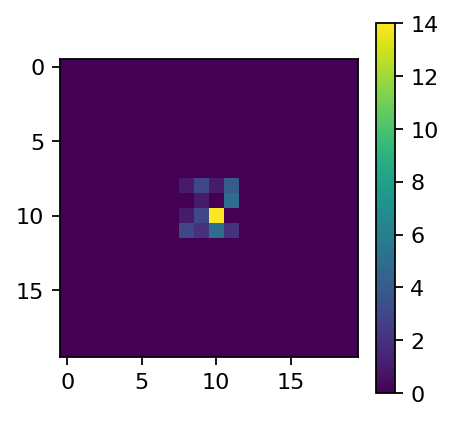

In [ ]:
sim=10
print(imagen_kriging[sim,sim],gray[sim,sim])
plt.figure()
dif=cv2.absdiff(gray,imagen_kriging)

plt.imshow(dif)
plt.colorbar()

plt.show()